# Scraps and snippets

Just various stuff from Brightfield competition on Colab, that are just bits of code that work but hit the cutting floor.

This notebook is simply a scratch pad full of snippets of code. It's essentially used like the [*scratch*] buffer in emacs.

**Binder is not a topic in this repo** (at least not now):

Unlike [Binder](https://mybinder.org/), Colab does not model a whole git repo of notebooks, only individual notebook files separately.

# Not scraps?




### Notes

In many ways this BioImage 2019 brightfield neuron reconstruction challenge dataset is a continuation of the work of The Allen's [BigNeuron project](https://alleninstitute.org/what-we-do/brain-science/news-press/articles/bigneuron-project-launched-advance-3d-reconstructions-neurons) of a few years ago. 

Here though there is only one type of data: brightfield imaging of biocytin stained neurons. Each neuron's image stack on the order of 10 gigabytes of data.


# JavaScript

Looks like `alert()` gets suppressed

In [0]:
%%javascript
// No work-y
alert('wassup, world?');

// Work-ie, yes
console.log("oy")

<IPython.core.display.Javascript object>

In [0]:
import IPython

# Nope:
js_code = '''
alert("heynow"); 
'''
display(IPython.display.Javascript(js_code))

<IPython.core.display.Javascript object>

In [0]:
# https://colab.research.google.com/notebooks/snippets/advanced_outputs.ipynb#scrollTo=iXZ0xoQd2kCe
import IPython
js_code = '''
document.querySelector("#output-area").appendChild(document.createTextNode("hello world!"));
'''
display(IPython.display.Javascript(js_code))

<IPython.core.display.Javascript object>

## Jump to an in-doc anchor

In [0]:
%%javascript

document.location.hash = "#cell-e26syI1yChlO";

<IPython.core.display.Javascript object>

In [0]:
import IPython
js_code = '''
document.location.hash = ""; // not a solution: https://stackoverflow.com/questions/11378868/move-browser-to-anchor-location-without-causing-the-page-to-refresh#comment14996864_11378883
document.location.hash = "#scrollTo=e26syI1yChlO";
console.log("ok1"); // This works.
'''
display(IPython.display.Javascript(js_code))

<IPython.core.display.Javascript object>

In [0]:
import IPython
js_code = '''
//document.location.hash = "#cell-e26syI1yChlO";
document.getElementById("cell-e26syI1yChlO").scrollIntoView()
'''
display(IPython.display.Javascript(js_code))


<IPython.core.display.Javascript object>

# Python langauge


In [16]:
foo = input('bar: ')
print(foo)

bar: dfdsfsf
dfdsfsf


In [0]:
foo = None

def bar():
  foo = 7

bar()
print(foo)

None


## Timing

In [0]:
%install_ext https://raw.github.com/cpcloud/ipython-autotime/master/autotime.py
%load_ext autotime

UsageError: Line magic function `%install_ext` not found.


In [0]:
%%time

for i in range(100000):
  j =+ i

print(j)

99999
CPU times: user 11.1 ms, sys: 851 µs, total: 11.9 ms
Wall time: 18.9 ms


## GPU

In [0]:
!nvidia-smi


Fri Dec  6 10:17:44 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.33.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
!pwd
!cd /content
!pwd
%cd /content
!pwd



In [0]:
# Download the 6GB of files for neuron "651806289", the image stack and SWC file
import boto3

s3 = boto3.resource('s3',
     endpoint_url = 'https://s3.us-west-1.wasabisys.com',
     aws_access_key_id = '2G7POM6IZKJ3KLHSC4JB',
     aws_secret_access_key = "0oHD5BXPim7fR1n7zDXpz4YoB7CHAHAvFgzpuJnt")  
bucket = s3.Bucket('brightfield-auto-reconstruction-competition')


a_prefix = "651806289/"
imagestack_bytes = 0
imagestack = []
swc_key = None
for s3_object in bucket.objects.filter(Prefix = a_prefix):
  print(s3_object.key + "= " + str(s3_object.size))
  if s3_object.key != a_prefix:
    # if == it's the directory itself, not a file in it so ignore
    imagestack.append(s3_object.key)
    imagestack_bytes += s3_object.size

# if a_prefix != "TEST_DATA_SET/":
#   training_neurons[a_prefix] = {"prefix": a_prefix, "swc": swc_key, "imagestack": imagestack, "size": imagestack_bytes}



In [0]:
!wget https://psu.box.com/shared/static/f4gs13fs0y9ckrjjo78oid7hkv61k2wq.zip
!unzip f4gs13fs0y9ckrjjo78oid7hkv61k2wq.zip

In [0]:
!ls /content/granuleCell63XStart
#/granuleCell63XStart/ ShuTu.Parameters.granule63XTest.dat

DG-151213-S1_63X_20percentOverlap_100617_redo_info.xml	slides
DG-151213-S1_63X_20percentOverlap_100617_redo_meta.xml


In [0]:
%%shell

# Get the Linux distro of ShuTu (took less than a minute to DL)
wget https://psu.box.com/shared/static/wszpq3r6hwgoxo8eq0vb1k82fwrabycl.zip
unzip wszpq3r6hwgoxo8eq0vb1k82fwrabycl.zip # creates ShuTuUbuntu directory

#set -m # needed to avoid error: bash: no job control in this shell
cd ShuTuUbuntu

##########
# This next part is from build.sh.
#
#export PATH=$downloadDir/local/bin:$PATH
cd mylib
make
cd ..
make


In [0]:
!ls ShuTuUbuntu/

analyzeNEO.py		 makefile	   ShuTuAutoTraceOneStack
analyzeSWC.py		 mylib		   ShuTuAutoTraceOneStack.c
build.sh		 processImages	   ShuTuAutoTraceOneStack.o
createTiffStacksZeiss	 processImages.c   ShuTu.Parameters.100X.dat
createTiffStacksZeiss.c  processImages.o   ShuTu.Parameters.63X.dat
createTiffStacksZeiss.o  scaleSWC	   ShuTu.Parameters.flyMotorNeuron.dat
distro			 scaleSWC.c	   ShuTu.Parameters.granule63XTest.dat
libShuTu.c		 scaleSWC.o	   ShuTu.Parameters.Purkinje.dat
libShuTu.h		 scaleSWC.py	   stitchTiles
libShuTu.o		 ShuTuAutoTrace    stitchTiles.c
libShuTu.so		 ShuTuAutoTrace.c  stitchTiles.o
llist			 ShuTuAutoTrace.o  tinydir.h


In [0]:
!cat ShuTuUbuntu/ShuTu.Parameters.63X.dat

In [0]:
!cat ShuTuUbuntu/ShuTu.Parameters.granule63XTest.dat

# This is the parameter file for ShuTuAutoTrace, and ShuTuAutoTraceOneStack 
# Comment lines start with #
# Each line consists of parameter name and value. THE NAME OF THE PARAMETER MUST NOT BE CHANGED! 
# ALL UNITS OF LENGTH ARE IN MICRONS UNLESS SPECFIED. The lengths are converted to pixel units in readParametersFromFile. 
# Important that often needs adjustments are at the top. Seldom-changed parameters are at the bottom. 

######
# 
# IMPORTANT PARAMETERS! 
#
######

# PARAMETERS FOR IMAGE TYPE AND DIMENSIONS, IMPORTANT!!! Used in all programs. 

imageType 			0  			# 0 for brightfield, 1 for dark field. 

xyDist 				0.103		# micron, distance between pixels in xy plane, 100X

zDist 				0.5			# micron, distance in z between planes. 

# PARAMETERS FOR SETTING UP AUTOTRACE In main of NeuTuAutoTrace.c and NeuTuAutoTraceOneStack.c 

nSplit 				1			# number of subdivision of a tiff stack in z (sub-slabs). 	
								# Increase this can help to resolve fine neurites in dense regions. But it

In [0]:
%%shell
cd ShuTuUbuntu

mpirun --allow-run-as-root -n 1 ./createTiffStacksZeiss /content/granuleCell63XStart/ granule
#mpirun --allow-run-as-root -n 1 processImages /content/granuleCell63XStart/
#mpirun --allow-run-as-root -n 1 ./stitchTiles /content/granuleCell63XStart/
#mpirun --allow-run-as-root -n 1 ./ShuTuAutoTrace /content/granuleCell63XStart/ ShuTu.Parameters.granule63XTest.dat # creates *.swc file

In [0]:
## Dev notes

# Seems libtiff is not pre-installed on Colab, http://www.libtiff.org/tools.html
!libtiff
!tiffinfo


In [0]:
# TIFF tools
# Seems libtiff is not pre-installed on Colab, http://www.libtiff.org/tools.html
!libtiff
!tiffinfo


In [0]:
#exif requires pip install.
# https://stackoverflow.com/a/47771508
import exifread
# Open image file for reading (binary mode)
f = open(a_tiff_file, 'rb')

# Return Exif tags
tags = exifread.process_file(f)

# Print the tag/ value pairs
for tag in tags.keys():
    if tag not in ('JPEGThumbnail', 'TIFFThumbnail', 'Filename', 'EXIF MakerNote'):
        print( "Key: %s, value %s" % (tag, tags[tag]))

In [0]:
# https://ipywidgets.readthedocs.io/en/latest/examples/Output%20Widget.html
import ipywidgets as widgets

out = widgets.Output(layout={'border': '1px solid black'})

from IPython.display import YouTubeVideo
with out:
    display(YouTubeVideo('eWzY2nGfkXk'))

#with out:
#    for i in range(10):
#        print(i, 'Hello world!')


# Files

[External data: Local Files, Drive, Sheets, and Cloud Storage](https://colab.research.google.com/notebooks/io.ipynb#scrollTo=eikfzi8ZT_rW)

## Uploading

https://colab.research.google.com/notebooks/io.ipynb#scrollTo=BaCkyg5CV5jF

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving carrot_top.output_1.jpg to carrot_top.output_1.jpg
Saving carrot_top.input.jpg to carrot_top.input.jpg
User uploaded file "carrot_top.output_1.jpg" with length 18478 bytes
User uploaded file "carrot_top.input.jpg" with length 207955 bytes


## Download

https://colab.research.google.com/notebooks/io.ipynb#scrollTo=hauvGV4hV-Mh

In [0]:
from google.colab import files

with open('example.txt', 'w') as f:
  f.write('some content')

files.download('example.txt')

## File browser

https://stackoverflow.com/a/48451751/4669056

In [0]:
# https://stackoverflow.com/a/48451751/4669056
import sys
import os
import ipywidgets as ui
from IPython.display import display

class PathSelector():

    def __init__(self,start_dir,select_file=True):
        self.file        = None 
        self.select_file = select_file
        self.cwd         = start_dir
        self.select      = ui.SelectMultiple(options=['init'],value=(),rows=10,description='') 
        self.accord      = ui.Accordion(children=[self.select]) 

        self.accord.selected_index = None # Start closed (showing path only)
        self.refresh('.') #self.refresh(self.cwd)
        self.select.observe(self.on_update,'value')

    def on_update(self,change):
        if len(change['new']) > 0:
            self.refresh(change['new'][0])

    def refresh(self,item):
        path = os.path.abspath(os.path.join(self.cwd,item))

        if os.path.isfile(path):
            if self.select_file:
                self.accord.set_title(0,path)  
                self.file = path
                self.accord.selected_index = None
            else:
                self.select.value = ()

        else: # os.path.isdir(path)
            self.file = None 
            self.cwd  = path

            # Build list of files and dirs
            keys = ['[..]']; 
            for item in os.listdir(path):
                if item[0] == '.':
                    continue
                elif os.path.isdir(os.path.join(path,item)):
                    keys.append('['+item+']'); 
                else:
                    keys.append(item); 

            # Sort and create list of output values
            keys.sort(key=str.lower)
            vals = []
            for k in keys:
                if k[0] == '[':
                    vals.append(k[1:-1]) # strip off brackets
                else:
                    vals.append(k)

            # Update widget
            self.accord.set_title(0,path)  
            self.select.options = list(zip(keys,vals)) 
            with self.select.hold_trait_notifications():
                self.select.value = ()

f = PathSelector('/content')
display(f.accord)

Accordion(children=(SelectMultiple(options=(('[..]', '..'), ('[sample_data]', 'sample_data')), rows=10, value=…

## pip ipyfilechooser

In [0]:
!pip install ipyfilechooser

In [0]:
# https://pypi.org/project/ipyfilechooser/

from ipyfilechooser import FileChooser

# Create and display a FileChooser widget
fc = FileChooser('/content/sample_data')
#display(fc)

# Print the selected path, filename, or both
print(fc.selected_path)
print(fc.selected_filename)
print(fc.selected)

# Change defaults and reset the dialog
fc.default_path = '/content/sample_data/'
fc.default_filename = 'README.md'
fc.reset()

# Shorthand reset
fc.reset(path='/content/sample_data', filename='README.md')

# Change hidden files
fc.show_hidden = True

# Show or hide folder icons
fc.use_dir_icons = True

# Change the title (use '' to hide)
fc.title = '<b>JFTs FileChooser demo</b>'

# Sample callback function
def change_title(chooser):
    chooser.title = '<b>Callback function executed</b>'

# Register callback function
fc.register_callback(change_title)

display(fc)



None
None
None


FileChooser(path='/content/sample_data', filename='README.md', show_hidden='True')

In [0]:
!pwd
!ls

/content
sample_data


# Image processing

## Colormapping


In [0]:
input_image = np.array(Image.open(mid_depth_filename))
plt.figure(figsize=(15,15)) 
plt.title("z = %d" % mid_index)
plt.imshow(input_image, cmap = plt.cm.gray)
pass #suppress cell output noise

In [0]:
# View in false colors

# Now we can create a grid, optional header_row and header_column
# control whether we want header elements in the grid
grid = widgets.Grid(2, 2, header_row=False, header_column=False)
with grid.output_to(0, 0):
  print("Inverse")
  plt.imshow(input_image, cmap = plt.cm.gray_r, aspect="equal") 
  #plt.axis("off")
  # via https://stackoverflow.com/a/57936903
  plt.axis("off") 
  plt.axis("tight") # gets rid of white border
  #plt.axis("image") # square up the image instead of filling the "figure" space
with grid.output_to(0, 1):
  print("Cubehelix")
  plt.imshow(input_image, cmap = plt.cm.cubehelix) #gray) 
  plt.axis("off")
  plt.axis("tight") # gets rid of white border
with grid.output_to(1, 0):
  print("Viridis")
  plt.imshow(input_image, cmap = 'viridis') 
  plt.axis("off")
  plt.axis("tight") # gets rid of white border
with grid.output_to(1, 1):
  print("Turbo")
  plt.imshow(input_image, cmap = turbo_cmap)
  plt.axis("off")
  plt.axis("tight") # gets rid of white border


## TIFF downsampling


## View a downsampled TIFF

 Those big files are needed to feed to the automated reconstruction system.

Downsampling would be nice, for an over-the-web view for humans to look at.

In [0]:
output_file_name = "/content/brightfield_challenge_dataset/651806289/reconstruction_0_0539044762_644941196-0001.downsampled.tif"

# https://stackoverflow.com/a/16696155
def process_image(image):
    "Processes the image to 1/10 size"
    new_image = image.resize((573, 389), Image.ANTIALIAS) # or whatever you are doing to the image
    return new_image

image = Image.open(a_tiff_file)
proc_image = process_image(image)
proc_image.save(output_file_name)



## A lame image viewer

Lame b/c the value of the max of the slider (a Google Forms thing) cannot be set from code.

This is a kinda lame little Z-stack image view. Lame b/c cannot programmatically set max value of slider.

Note, this UI looks cleaner if you [config this next cell to Form|Hide code](https://colab.research.google.com/notebooks/forms.ipynb#scrollTo=hVEG5D5TxFKW), after running it once.

**TODO:** Get rid of the hardcoded slider, somehow. Whelp, next technique works, so this whole cell should be moved to the cutting floor notebook.


In [0]:
#@title  { run: "auto", display-mode: "form" }
#@markdown Stack viewer
z_index = 34 #@param {type:"slider", min:1, max:400, step:1}

sns.set(style="white")

if z_index < z_stack_height:
  basename = os.path.basename(specimen["image_stack"][z_index])
  image_filename = os.path.join(downsampled_directory, basename)
  downed_image = PIL.Image.open(image_filename)
  plt.title("z = %d" % z_index)
  plt.imshow(downed_image, cmap = plt.cm.gray)
else:
  print("This downsampled image stack's max index is: %d" % z_stack_height )

## Downsampling one image

Why not all?
This whole section is kinda lame. Just chop it to a separate file of scraps. This just make the doc overlong. (Was useful originally.)

- /content/allen_institute_dataset/651806289/src
  - keep src and build in same directory, per cell
- should matplotlib side-by-side orig and downsampled images


In [0]:
!ls -l /content/allen_institute_dataset/651806289/src/reconstruction_0_0539044762_644941196-0001.*

In [0]:
# display original image
import matplotlib.pyplot as plt

# Assuming neuron ID 651806289 has been downloaded, here's a .tif file
a_tiff_file = "/content/allen_institute_dataset/651806289/src/reconstruction_0_0539044762_644941196-0001.tif"
input_image = Image.open(a_tiff_file)

plt.imshow(input_image, cmap = plt.cm.gray) 
# Need to tell matplotlib.pyplot.imshow how to interpret the 8-bit grayscale
# Otherwise, it will render mono-greenscale

In [0]:
# display original image
import matplotlib.pyplot as plt

# Assuming neuron ID 651806289 has been downloaded, here's a .tif file
a_tiff_file = "/content/allen_institute_dataset/651806289/src/reconstruction_0_0539044762_644941196-0001.tif"
input_image = Image.open(a_tiff_file)

plt.imshow(input_image, cmap = plt.cm.gray) 
# Need to tell matplotlib.pyplot.imshow how to interpret the 8-bit grayscale
# Otherwise, it will render mono-greenscale

As you can see from the axis, the image was decimated i.e. downsampled to 1/10 original size: 

(5730, 3890) => (573, 389)

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'wx', 'qt4', 'qt5', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'inline', 'ipympl', 'widget']


In [0]:
from google.colab import files
from PIL import Image

output_file_name = "/content/allen_institute_dataset/651806289/reconstruction_0_0539044762_644941196-0001.downsampled.tif"

outfile = Image.open(output_file_name)

print( "size: %dx%d" % outfile.size)
files.download(output_file_name) 


## Horizontal concatination


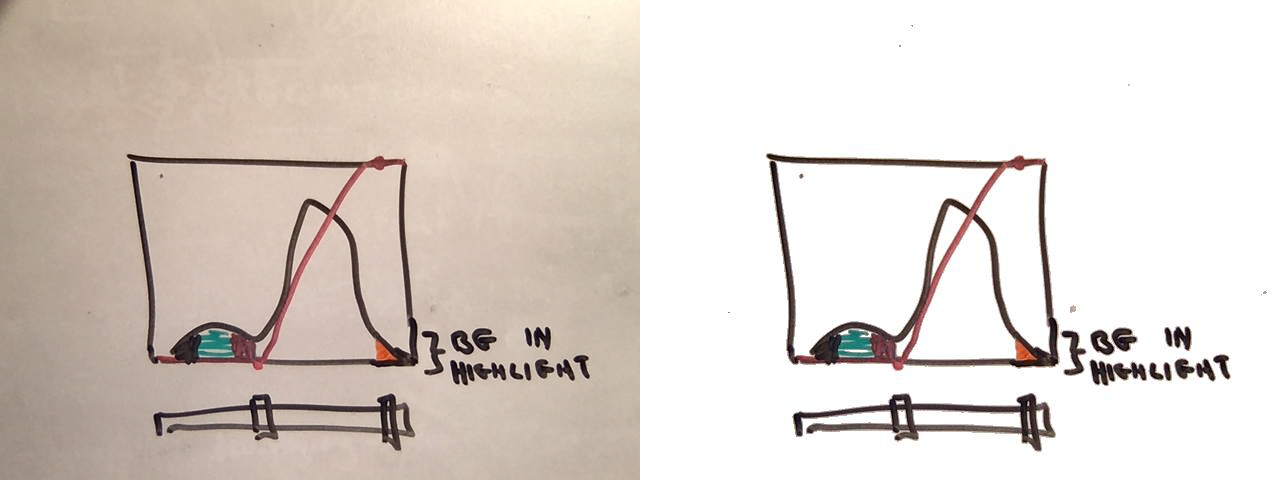

In [13]:
# carrot_top.output_1.jpg
# carrot_top.input.jpg

# Via https://stackoverflow.com/a/30228789/4669056
import numpy as np
import PIL
from IPython.display import display

image_filenames = ['carrot_top.input.jpg', 'carrot_top.output_1.jpg']
images = [ PIL.Image.open(i) for i in image_filenames ]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in images])[0][1]
imgs_comb = np.hstack( list((np.asarray( i.resize(min_shape) ) for i in images ) ) )

# save that beautiful picture
output_filename = 'concatinated.jpg'
concatted_image = PIL.Image.fromarray( imgs_comb)
concatted_image.save( output_filename )

def add_border(an_image, output_image, border):
  if isinstance(border, int) or isinstance(border, tuple):
    bimg = PIL.ImageOps.expand(an_image, border=border)
  else:
    raise RuntimeError('Border is not an integer or tuple!')
bimg.save(output_image)


#print('hi')
#!ls -lh
display(concatted_image)


# Junkers

## ipywidgets and Colab



In [0]:
# https://stackoverflow.com/questions/47269168/ipywidgets-with-google-colaboratory
#!pip install ipywidgets

from ipywidgets import interact

def f(x):
  return x

interact(f, x=10)

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

<function __main__.f>

## Test links in GitHub


<a href="https://colab.research.google.com/github/reconstrue/brightfield_neuron_reconstruction/blob/master/brightfield_skeleton_juxtaposer.ipynb" target="_parent">
    <img src="https://colab.research.google.com/assets/colab-badge.svg"/>
</a>

In [0]:
# CHEAP HACK to make a smaller MinIP file for github attachment.
# 22MB is too big for github issues
import PIL                  
full_size = PIL.Image.open("/content/allen_institute_dataset/651806289/651806289.min_intensity_projection.tif")
width, height = full_size.size
quarter_size = full_size.resize((int(width/2), int(height/2)))

projection_filename = specimen_id + ".min_intensity_projection.tif"
absolute_filename = os.path.join(data_dir, specimen_id, projection_filename)  
quarter_size.save("/content/allen_institute_dataset/651806289/651806289.min_intensity_projection.tif")


In [0]:
# CHEAP HACK to make a smaller MinIP file for display()
# 86M too big?
import PIL                  
full_size = PIL.Image.open(colorized_filename)
width, height = full_size.size
print(width, height)
quarter_size = full_size.resize((int(width/2), int(height/2)), Image.ANTIALIAS)

projection_filename = specimen_id + ".min_intensity_projection.colorized_smaller.tif"
small_color_projection_fullpath = os.path.join(data_dir, specimen_id, projection_filename)  
quarter_size.save(small_color_projection_fullpath)
print(small_color_projection_fullpath )



## MPL for movie making

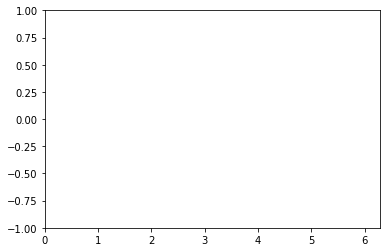

In [0]:
# https://stackoverflow.com/a/43447370
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

t = np.linspace(0,2*np.pi)
x = np.sin(t)

fig, ax = plt.subplots()
ax.axis([0,2*np.pi,-1,1])
l, = ax.plot([],[])

def animate(i):
    l.set_data(t[:i], x[:i])
a
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t))

from IPython.display import HTML


#HTML(ani.to_jshtml())
HTML(ani.to_html5_video())

## Callback via input type="range"



In [0]:
# https://gist.github.com/korakot/c1dd8575ea9de6c218011d7bf996ba0f
from ctypes import cast, py_object
from google.colab import output

def set_var(v_id, value):
  obj = cast(v_id, py_object).value
  print(value)
  obj.value = value
  
output.register_callback('set_var', set_var)

class Slider:
  def __init__(self, value=0, min=0, max=100, step=1):
    self.value = value
    self.min = min
    self.max = max
    self.step = step
    
  def _repr_html_(self):
    name = id(self)
    return f"""
    <input type="range" id="in{name}"
     min="{self.min}" max="{self.max}" step="{self.step}"
     value="{self.value}"
     oninput="out{name}.value=in{name}.value"
     onchange="
       google.colab.kernel.invokeFunction(
         'set_var', [{name}, this.valueAsNumber],
         {{}})
     "
    >
    <output id="out{name}">{self.value}</output>
    """
  
slidy = Slider(100, 0, 500, 1)
display(slidy)


In [0]:
class Foo:
  def bar(self):
    print("bar")
    
    
f = Foo()
f.bar()

bar


## Working code but on cutting floor


In [0]:
from getpass import getpass
import os

pw = getpass("John, enter PW below:\n")
print(pw)

In [0]:
import sys

print("\n")
if "allensdk" in sys.modules:
  print("AllenSDK is installed.")
else:
  print("WARNING: AllenSDK is NOT install.")

#print(sys.modules.allensdk)

In [0]:
# From allensdk_sanity_check.ipynb:
#   https://colab.research.google.com/drive/1Px_aDlPto8h6zJDaq_YcFouLbEXkNlZL#scrollTo=qskYZLlK9QJX
from allensdk.api.queries.rma_api import RmaApi

rma = RmaApi()
# Perform a simple test query against AIBS' public API
fetched_data = rma.model_query('Atlas', criteria="[name$il'*Human*']")
if len(fetched_data) > 0:
  print( "Length of fetched_data: ", (len(fetched_data)) )
else:
  print( "WARNING: Zero data records fetched. Probably a failure." )

In [0]:
from allensdk.api.queries.rma_api import RmaApi

rma = RmaApi()

data = rma.model_query('Atlas',
                       criteria="[name$il'*Mouse*']")
data

In [0]:
# Seemed to work
import sys

print("\n")
if "allensdk" in sys.modules:
  print("AllenSDK is installed.")
else:
  print("WARNING: AllenSDK is NOT install.")

In [0]:
import pprint
pretty = pprint.PrettyPrinter(indent=2)
pretty.pprint(sys.modules)
#print(sys.modules)
#print(sys.modules.allensdk)


In [0]:
import pprint
pretty = pprint.PrettyPrinter(indent=2)
pretty.pprint(sys.modules)

#print(sys.modules)


In [0]:
# Detects AllenSDK but Python 2.x does not have importlib.util
# SWDB_2018 files internally call for Python2 so Colab does that.
# Ergo, ImportError: No module named util
import importlib.util
import pkg_resources
import sys

# See https://stackoverflow.com/a/41815890
package_name = "allensdk"

spec = importlib.util.find_spec(package_name)
if spec is None:
    print(package_name +" is NOT installed")
else:
    print("%s (version: %s) is installed." % (package_name, pkg_resources.get_distribution("allensdk").version))

In [0]:
# This works but is essentially hardwired to Python 3, yet Colab might be doing Python 2

# Check dist-packages/ for allensdk*
!echo "If allensdk installed, then there should be two directories:"
!ls /usr/local/lib/python3.6/dist-packages | grep "allensdk"

!echo "-------------------------"

!echo "One directory is 'allensdk' which contains:"
!ls /usr/local/lib/python3.6/dist-packages/allensdk

!echo "-------------------------"

!echo "Second directory is record of install, with version number:"
!ls -d /usr/local/lib/python3.6/dist-packages/allensdk-*

### File size test

In [0]:
import requests

a_big_fatty_url = "http://reconstrue.com/projects/brightfield_neurons/demo_images/651806289_minip_cubehelix_wide.png"
a_filename = "651806289_minip_cubehelix_wide.png"

r = requests.get(a_big_fatty_url, allow_redirects=True)
open(a_filename, 'wb').write(r.content)
!ls -lh 


total 7.5M
-rw-r--r-- 1 root root 7.5M Apr 20 18:59 651806289_minip_cubehelix_wide.png
drwxr-xr-x 1 root root 4.0K Apr  3 16:24 sample_data


## Does not work


### Flacky mechanism
This next bit is being a real pain in the ass. Problem is that is seems to random, often report "WARNING: AlleSDK is NOT installed." When in actually it seems to be according to a followup `import foo from allensdk.*` Perhaps there is a better way to test if a package is installed. 

In [0]:
import sys

# print("\n")
if "allensdk" in sys.modules:
  print("AllenSDK is installed.")
else:
  print("WARNING: AllenSDK is NOT install.")

### Confused assumptions
If `AllenSDK` is uninstalled and its classes loaded into the Python runtime on the server, then `pip uninstall` can work yet those already classes *seem* to still be live in the Python runtime.  I.e. the `pip uninstall` uninstalls files but classes already parsed into the runtime are still there, until a runtime restart.

**TODO:** Confirm that after a runtime restart the package really is fully uninstalled i.e. classes can not be instantiated or detected.

In [0]:
# Perform a simple test query against AIBS' public RESTful API
#
# TODO: Intentionally defeated cache? or complexing issues, are we here?
#   Maybe a network test snippet would be good. With random string in the query criteria

from allensdk.api.queries.rma_api import RmaApi

rma = RmaApi()

fetched_data = rma.model_query('Atlas', criteria="[name$il'*Human*']")
if len(fetched_data) > 0:
  print( "Length of fetched_data: ", (len(fetched_data)) )
else:
  print( "WARNING: Zero data records fetched. Probably a failure." )

### R

This was working in 2019 but 2020 no R magic?

In [0]:
%%R

x <- runif(10)
y <- runif(10)


# ------[ Unrooted ]------

# skimage



In [0]:
from skimage import data

original = data.astronaut()
grayscale = skimage.color.rgb2gray(original)
print(type(grayscale))
print(type(original))

# Animated GIF

TIFF, downsampled TIFF, then GIF?

In [0]:
# 2 constants:
tifs_directory = "/content/built/downsampled/651806289/"
gifs_directory = "/content/built/downsampled/651806289/giffed/"

from PIL import Image
import matplotlib.pyplot as plt
from os.path import isfile, join
import os

if not os.path.exists(gifs_directory):
  os.makedirs(gifs_directory)

# https://stackoverflow.com/a/3207973
only_files = [f for f in listdir(tifs_directory) if isfile(join(tifs_directory, f))]

only_files.sort()

for a_file in only_files:
  in_file = join(tifs_directory, a_file)
  outname = os.path.basename(os.path.splitext(a_file)[0]) + ".gif"
  out_file = join(gifs_directory, outname)
  print(out_file)
  an_image = Image.open(in_file)  
  an_image.save(out_file, format="GIF")
  

In [0]:
# This loads all files in a dir, that start with reconstruction_0_0539044762_644941196-
# Those 291 files are crammed into an animated GIF
#
# This was made while trying a multiple step process
# 1. decimate tif to tif
# 2. translate tif to gif
# 3. animate gif
# But maybe that wasn't necessary. Maybe an odd sized file was causing trouble.


# One constant needs to be set:
images_directory = "/content/built/downsampled/651806289/giffed/"


from PIL import Image
import matplotlib.pyplot as plt
from os.path import isfile, join

# https://stackoverflow.com/a/3207973
only_files = [f for f in listdir(images_directory) if isfile(join(images_directory, f))]

only_files.sort()

image_stack = []

for a_file in only_files: 
  if a_file.startswith("reconstruction_0_0539044762_644941196-"):
    print(join(images_directory, a_file))
    image_stack.append(Image.open(join(images_directory, a_file)))  

animation_file_name = join(images_directory, "image_stack.gif")
# https://www.pythoninformer.com/python-libraries/pillow/creating-animated-gif/
image_stack[0].save(animation_file_name,
               format="GIF",
               save_all=True,
               append_images=image_stack[1:],
               duration=50,
               loop=0)


# MPI

https://stackoverflow.com/questions/57745296/how-can-i-run-mpi4py-code-on-google-colab

In [0]:
!mpiexec -np 4 python my-program-name.py

# IPython



In [0]:
from IPython.display import IFrame
IFrame(src= "https://tigue.com", width="100%", height="950px",frameBorder="0")

# Emacs

In [0]:
%%time
!apt-get install emacs
!echo ---
!emacs --version
!echo ---


Reading package lists... Done
Building dependency tree       
Reading state information... Done
emacs is already the newest version (47.0).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
---
GNU Emacs 25.2.2
Copyright (C) 2017 Free Software Foundation, Inc.
GNU Emacs comes with ABSOLUTELY NO WARRANTY.
You may redistribute copies of GNU Emacs
under the terms of the GNU General Public License.
For more information about these matters, see the file named COPYING.
---
CPU times: user 81.7 ms, sys: 13.5 ms, total: 95.2 ms
Wall time: 7.73 s


# Bossphorus

A simple `pip install` will fail:
```
$ pip install -U bossphorus --log /content/pip_log.txt

Collecting bossphorus
  Using cached https://files.pythonhosted.org/packages/d1/88/48592ad7cec175af4147205061822f68144660a65e16fa4162408057dffb/bossphorus-0.1.0.tar.gz
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.
```

In [0]:
conda install blosc python-blosc

SyntaxError: ignored

[bossphorus via pip](https://github.com/aplbrain/bossphorus#pip-method)



In [0]:
!wget https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
!chmod +x Miniconda3-4.5.4-Linux-x86_64.sh
!bash ./Miniconda3-4.5.4-Linux-x86_64.sh -b -f -p /usr/local

--2020-01-26 06:38:30--  https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58468498 (56M) [application/x-sh]
Saving to: ‘Miniconda3-4.5.4-Linux-x86_64.sh.2’

Miniconda3-4.5.4-Li 100%[===================>]  55.76M   134MB/s    in 0.4s    

2020-01-26 06:38:30 (134 MB/s) - ‘Miniconda3-4.5.4-Linux-x86_64.sh.2’ saved [58468498/58468498]

PREFIX=/usr/local
installing: python-3.6.5-hc3d631a_2 ...
Python 3.6.5 :: Anaconda, Inc.
installing: ca-certificates-2018.03.07-0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: libgcc-ng-7.2.0-hdf63c60_3 ...
installing: libstdcxx-ng-7.2.0-hdf63c60_3 ...
installing: libffi-3.2.1-hd88cf55_4 ...
installing: ncurses-6.1-hf484d3e_0 ...
installing: openssl-1.0.2o-h20670df_0 ...
installing:

In [0]:
!conda install blosc python-blosc

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.4
  latest version: 4.8.1

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /usr/local

  added / updated sp

In [0]:
pip install Flask

     |████████████████████████████████| 102kB 3.9MB/s 
     |████████████████████████████████| 81kB 12.6MB/s 
     |████████████████████████████████| 327kB 56.9MB/s 
     |████████████████████████████████| 133kB 57.9MB/s 
  Created wheel for MarkupSafe: filename=MarkupSafe-1.1.1-cp38-cp38-linux_x86_64.whl size=32728 sha256=45b8d9d75bacb12e7edfcb46570b6a8c404f3cb2b66fa2b60a015f55dd7d83d7
  Stored in directory: /root/.cache/pip/wheels/f2/aa/04/0edf07a1b8a5f5f1aed7580fffb69ce8972edc16a505916a77
Successfully built MarkupSafe


In [0]:
pip install -U bossphorus --log /content/pip_log.txt

Requirement already up-to-date: bossphorus in /usr/local/lib/python3.8/site-packages (0.1.0)


In [0]:
cat /content/pip_log.txt

2020-01-26T06:53:28,583 Created temporary directory: /tmp/pip-ephem-wheel-cache-qvahp5l1
2020-01-26T06:53:28,584 Created temporary directory: /tmp/pip-req-tracker-3z8j96p3
2020-01-26T06:53:28,584 Created requirements tracker '/tmp/pip-req-tracker-3z8j96p3'
2020-01-26T06:53:28,584 Created temporary directory: /tmp/pip-install-cxtzpfp9
2020-01-26T06:53:28,586 1 location(s) to search for versions of bossphorus:
2020-01-26T06:53:28,586 * https://pypi.org/simple/bossphorus/
2020-01-26T06:53:28,587 Getting page https://pypi.org/simple/bossphorus/
2020-01-26T06:53:28,587 Found index url https://pypi.org/simple
2020-01-26T06:53:28,663 Analyzing links from page https://pypi.org/simple/bossphorus/
2020-01-26T06:53:28,664   Found link https://files.pythonhosted.org/packages/d1/88/48592ad7cec175af4147205061822f68144660a65e16fa4162408057dffb/bossphorus-0.1.0.tar.gz#sha256=7dd36559595b71346d10c86490cf288ab782fa1eb4262e02c6ef09c96b276488 (from https://pypi.org/simple/bossphorus/), version: 0.1.0
2020

In [0]:
!rm /content/pip_log.txt

# NWB: nwb-jupyter-widgets

In [0]:
pip install nwbwidgets

     |████████████████████████████████| 102kB 3.1MB/s 
     |████████████████████████████████| 460kB 8.4MB/s 
     |████████████████████████████████| 2.9MB 12.7MB/s 
     |████████████████████████████████| 122kB 40.9MB/s 
     |████████████████████████████████| 1.1MB 29.6MB/s 
     |████████████████████████████████| 4.5MB 38.1MB/s 
     |████████████████████████████████| 112kB 48.8MB/s 
     |████████████████████████████████| 256kB 50.9MB/s 
     |████████████████████████████████| 552kB 50.6MB/s 


# Vaex

In [0]:
example_volume_rendering.html